# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

- `crim`: per capita crime rate by town  
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft  
- `indus`: proportion of non-retail business acres per town   
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
- `nox`: nitrogen oxide concentration (parts per 10 million)   
- `rm`: average number of rooms per dwelling   
- `age`: proportion of owner-occupied units built prior to 1940  
- `dis`: weighted mean of distances to five Boston employment centers   
- `rad`: index of accessibility to radial highways   
- `tax`: full-value property-tax rate per \$10,000   
- `ptratio`: pupil-teacher ratio by town    
- `b`: 1000(Bk - 0.63)^2 where Bk is the proportion of African American individuals by town   
- `lstat`: lower status of the population (percent)   
- `medv`: median value of owner-occupied homes in $10000s 
  
    
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [1]:
import pandas as pd #import pandas

In [2]:
import matplotlib.pyplot as plt #improt matplot for visualization
%matplotlib inline

In [3]:
import numpy as np #import numpy

In [23]:
df = pd.read_csv('train.csv') #open housing data file... check length ... .head() to look at first 5 rows
print(len(df))
df.head(30)

333


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [5]:
df.info() 
# info about dataframe... 
# 1. no null values 
# 2. all int or floats
# 3. 15 columns and 334 rows (because starting at 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
b          333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
df.describe()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


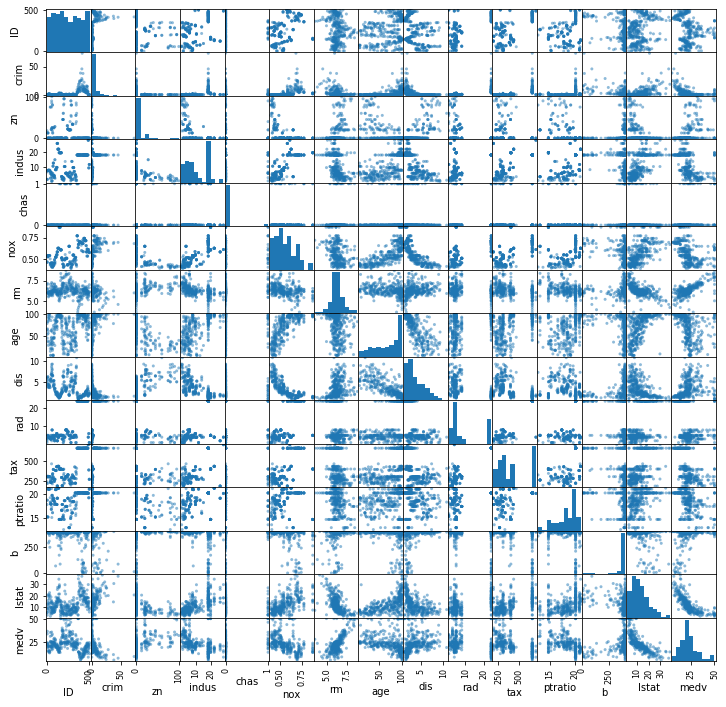

In [9]:
pd.plotting.scatter_matrix(df, figsize=(12,12));

0.26169000000000003 is the median crime rate
3.0923 is the median distance from employment centers


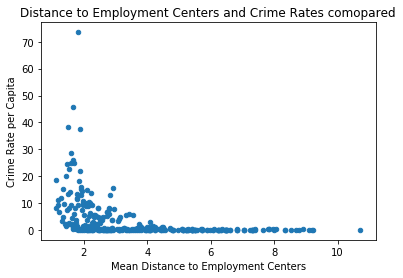

In [22]:
df.plot('dis', 'crim', kind='scatter');
plt.title('Distance to Employment Centers and Crime Rates comopared')
plt.xlabel('Mean Distance to Employment Centers')
plt.ylabel('Crime Rate per Capita');
print(str(df['crim'].median()) + ' is the median crime rate')
print(str(df['dis'].median()) + ' is the median distance from employment centers')
#areas closer to employmetn centers have significantly higher crime rates
#the maximum crime rate in an area is 73.5 which is drastically higher than the median

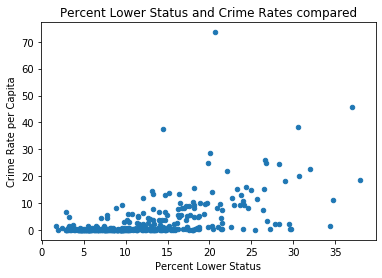

In [26]:
df.plot('lstat', 'crim', kind='scatter');
plt.title('Percent Lower Status and Crime Rates compared')
plt.xlabel('Percent Lower Status')
plt.ylabel('Crime Rate per Capita');
#perhaps because as noted above distance from employment centers was correllated with higher crime rates,
#lower socio-economic status by housing data does not seem to correllate with higher crime rates.

Text(0.5, 1.0, 'Crime Rates Compared to Distance with heat map of lower status')

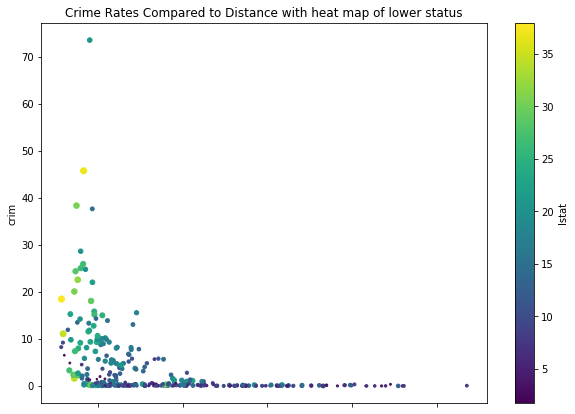

In [55]:
ax = df.plot.scatter('dis', 'crim', 
                        c = 'lstat',
                        s = df['lstat'],
                        colormap = 'viridis',
                        figsize = (10,7));

ax.set_title('Crime Rates Compared to Distance with heat map of lower status')

In [44]:
df_on_charles = df.loc[df['chas'] == 1]
df_off_charles = df.loc[df['chas'] !=1 ]
print(len(df_on_charles))
print(len(df_off_charles))
df_on_charles.describe()

20
313


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,255.600000,2.163972,8.500000,12.330000,1.0,0.593595,6.577750,75.815000,3.069540,9.900000,394.550000,17.38500,380.681000,11.118000,30.175000
std,75.913663,2.885734,21.830688,6.505255,0.0,0.146237,0.814341,22.808638,1.343724,8.534142,171.795005,2.22906,21.661541,7.198281,12.362204
min,143.000000,0.015010,0.000000,1.210000,1.0,0.401000,5.403000,24.800000,1.129600,1.000000,198.000000,13.60000,321.020000,2.960000,13.400000
25%,211.250000,0.200377,0.000000,6.200000,1.0,0.489000,6.111250,58.325000,2.041250,4.750000,276.750000,14.85000,377.565000,5.007500,21.700000
50%,236.000000,0.572070,0.000000,12.240000,1.0,0.528500,6.322500,86.000000,3.080050,5.000000,307.000000,17.40000,390.580000,9.735000,26.050000
75%,302.250000,3.453213,0.000000,18.100000,1.0,0.693500,6.913250,92.925000,4.095200,12.000000,468.750000,19.00000,395.240000,14.775000,37.900000
max,373.000000,8.982960,90.000000,19.580000,1.0,0.871000,8.375000,100.000000,5.885000,24.000000,666.000000,20.20000,396.900000,26.820000,50.000000


In [45]:
df_off_charles.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,313.000000,313.000000,313.000000,313.000000,313.0,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,250.654952,3.436787,10.829073,11.227252,0.0,0.554815,6.245674,67.741534,3.750853,9.616613,410.220447,18.515974,358.110511,12.604728,22.295527
std,151.365227,7.544289,22.754198,7.032974,0.0,0.112555,0.693026,28.400933,2.009606,8.768386,171.014186,2.132487,88.984202,7.061663,8.746397
min,1.000000,0.006320,0.000000,0.740000,0.0,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,118.000000,0.078750,0.000000,4.950000,0.0,0.453000,5.879000,43.700000,2.132900,4.000000,281.000000,17.400000,376.700000,7.220000,17.200000
50%,245.000000,0.245220,0.000000,9.690000,0.0,0.538000,6.185000,76.500000,3.092300,5.000000,330.000000,19.100000,392.230000,11.220000,21.200000
75%,387.000000,3.678220,12.500000,18.100000,0.0,0.624000,6.563000,93.800000,5.214600,24.000000,666.000000,20.200000,396.330000,16.440000,24.700000
max,506.000000,73.534100,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
# on river homes had a higher median value of homes
# there were significantly fewer zones on the charles river than off

In [46]:
df_crim_over_1 = df.loc[df['crim'] >= 1]
df_crim_under_1 = df.loc[df['crim'] < 1 ]
print(len(df_crim_over_1))
print(len(df_crim_under_1))
df_crim_over_1.describe()

118
215


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.00000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,352.076271,9.136515,0.0,17.851695,0.076271,0.675305,5.949746,89.60678,2.188175,19.093220,593.991525,19.263559,309.172797,17.556525,18.174576
std,135.000421,10.059485,0.0,2.497693,0.266563,0.088213,0.709874,14.17162,0.729750,8.442857,125.742410,2.150041,126.388758,7.433980,9.517839
min,17.000000,1.053930,0.0,8.140000,0.000000,0.532000,3.561000,29.30000,1.129600,4.000000,304.000000,14.700000,3.500000,1.730000,5.000000
25%,322.500000,2.844785,0.0,18.100000,0.000000,0.605000,5.599750,87.92500,1.650175,9.750000,494.250000,20.200000,275.615000,12.720000,12.700000
50%,401.500000,5.848030,0.0,18.100000,0.000000,0.679000,6.076500,94.65000,2.054700,24.000000,666.000000,20.200000,374.495000,16.840000,16.200000
75%,451.250000,10.999025,0.0,18.100000,0.000000,0.713000,6.338750,98.42500,2.515925,24.000000,666.000000,20.200000,395.275000,21.962500,21.400000
max,488.000000,73.534100,0.0,21.890000,1.000000,0.871000,8.375000,100.00000,4.498600,24.000000,666.000000,21.200000,396.900000,37.970000,50.000000


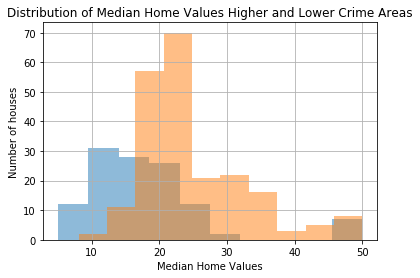

In [54]:
df_crim_over_1['medv'].hist(alpha = .5);
plt.title('Distribution of Median Home Values in High Crime Areas')
plt.xlabel('Median Home Values')
plt.ylabel('Number of houses');

df_crim_under_1['medv'].hist(alpha = .5);
plt.title('Distribution of Median Home Values Higher and Lower Crime Areas')
plt.xlabel('Median Home Values')
plt.ylabel('Number of houses');

In [ ]:
# This histogram showed more grouping toward lower median house prices in the dataframe with higher crime rates
# However, there was probably less difference and more overlap than expected.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!